# Análise Exploratória de Dados
A análise exploratória de dados é uma abordagem crucial para desvendar insights em conjuntos de dados. Ao mergulhar nos dados de forma inicial, identificamos padrões, tendências e anomalias, fornecendo uma base sólida para decisões informadas. Essa prática vai além das estatísticas básicas, explorando visualizações e resumos que dão vida ao contexto dos dados, permitindo compreender o que os números realmente querem nos contar.

# ENEM 2022 - Panorama do Projeto
O Enem (Exame Nacional do Ensino Médio) é uma avaliação educacional fundamental no Brasil, abrangendo diversas áreas de conhecimento que pode servir para ingressar em universidades brasileiras. Ao realizar este projeto básico de análise exploratória de dados (AED) com os microdados do Enem 2022, poderei extrair insights sobre o desempenho dos candidatos explorando padrões de respostas, distribuição de notas e correlações entre variáveis, o projeto revelará não apenas resultados quantitativos, mas também aspectos socioeconômicos e educacionais que impactam os participantes.

## Objetivo
O objetivo desde projeto é explorar e extrair insights no que se refere aos microdados do ENEM 2022. Algumas perguntas a serem respondidas:
- Qual é o perfil socioeconômico do "candidato típico" apto a ingressar em uma universidade.
- Qual é o perfil socioeconômico do "candidato típico" apto a ingressar em uma universidade que obtém as notas que estão entre as 5% melhores.
- O que uma AED pode sugerir como estratégia para melhorar as notas de um candidato?

Por candidato típico, quero dizer o perfil da maioria dos candidatos no recorte observado.

A análise não fará modelagem preditiva. Aqui explorarei apenas correlações entre as variáveis.

## Metodologia
1) Origem e fonte dos Dados

Os dados utilizados nesta análise foram baixados do portal do INEP (Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira) na URL: [https://download.inep.gov.br/microdados/microdados_enem_2022.zip](https://download.inep.gov.br/microdados/microdados_enem_2022.zip)
Ao Extrair o arquivo da base de dados,são criadas as seguintes pastas: 'DICIONÁRIO', 'DADOS', 'LEIA-ME E DOCUMENTOS TÉCNICOS', 'INPUTS' e 'PROVAS E GABARITOS'. Citarei adiante conforme necessário.

2) DICIONÁRIO DE MICRODADOS

O arquivo de metadados chamado 'Dicionário_​Microdados_​Enem_​2022.​xlsx', contém um dicionário das variáveis que constam na base dados principal, na pasta 'DICIONÁRIO'. Desta maneira é possível identificar categorias quando necessário. Para a análise, utilizarei os dados categóricos e farei o mapeamento das colunas da base de dados principal, sempre à partir do arquivo citado acima.

3) Mapeamento das respostas dos questionários

Carreguei o arquivo de metadados em um dataframe e com o mesmo aquivo aberto no gerenciador de planilhas notei um padrão e escrevi um código para ler o que serão as categorias e os valores de cada uma das colunas que representam as respostas  somente do questionário sociocultural. Salvei com o nome de 'dic_resp_questionario.txt' e farei a leitura do arquivo oportunamente.

4) Seleção de dados na base principal

    Como o objetivo é analisar somente candidatos que estão aptos a ingressar na universidade, farei algumas seleções;
    - alunos que compareceram em todas as provas (variáveis começadas com 'TP_PRESENCA_')
    - não tiveram problemas na redação (TP_STATUS_REDACAO)
    - já concluíram o ensino médio ou concluiriam naquele ano (TP_ST_CONCLUSAO)
    - não são treineiros (IN_TREINEIRO).
    - nenhuma nota zerada em provas objetivas (variáveis começadas com 'NU_NOTA_')    

    Excluir variáveis que não pretendo usar nas análises;

    - Ano do Enem - como não é série de tempo, essa informação é irrelevante na base de dados para o caso (NU_ANO)
    - cor de prova (variáveis começadas com 'CO_PROVA_')
    - vetor de respostas dos candidatos (variáveis começadas com 'TX_RESPOSTAS_')
    - vetor que contém o gabarito das provas (variáveis começadas com 'TX_GABARITO_')
    
    Notas com e sem redação;
 **A média aritimética da nota das provas para atribuição da nota final no ENEM é uma simplificação. É sabido que o Sistema de Seleção Unificada (Sisu) pode atribuir pesos diferentes para as provas dependendo do curso pleiteado, o que impacta a pontuação final do candidato.**

    Inseri nos dados uma coluna que contém as notas médias das provas objetivas e outra coluna que contém a média incluindo a nota da redação.

5) Estatística Descritiva

A estatística descritiva desempenha um papel crucial no projeto de análise exploratória dos microdados do Enem 2022, pois oferece uma síntese precisa das características fundamentais do conjunto de dados. Ao aplicar medidas como média, mediana, desvio-padrão, boxplots e histogramas, podemos compreender a distribuição das notas, identificar tendências e anomalias, proporcionando uma visão inicial valiosa. Essa abordagem é essencial para resumir e interpretar as informações, permitindo uma compreensão rápida e eficaz do desempenho dos candidatos.

Embora a estatística descritiva seja fundamental neste projeto, uma análise mais abrangente poderia incluir técnicas de análise preditiva para antecipar tendências futuras com base nos dados históricos. No entanto, essa extensão não faz parte do escopo atual, focando, por ora, a exploração aprofundada dos padrões existentes no conjunto de dados do Enem 2022.

6) Etapas da análise (Código)

In [1]:
# CARREGAR BIBLIOTECAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import ast

In [2]:
# ARQUIVO COM OS MICRODADOS
arquivo_enem = '/home/gabriel/Documentos/datasets/enem2022/DADOS/MICRODADOS_ENEM_2022.csv'

# SALVAR OS NOMES DE TODAS AS COLUNAS EM TXT
todas_as_colunas = pd.read_csv(arquivo_enem, nrows=2, encoding='ISO-8859-1').columns.tolist()
with open('todas_as_colunas.txt', 'w', encoding='ISO-8859-1') as arquivo_saida:
    for nome_coluna in todas_as_colunas:
        arquivo_saida.write(f'{nome_coluna}\n')

Neste passo eu abri o arquivo 'todas_as_colunas.txt' e deixei somente as colunas que quero excluir da seleção, ou seja, colunas que não são do interesse da análise. Salvei com o nome 'colunas_a_excluir.txt'.

In [3]:
# CARREGA LISTA DE COLUNAS QUE NÃO SERÃO CARREGADAS
with open('colunas_a_excluir.txt', 'r') as file:
    colunas_a_excluir = file.read().strip().split(';')

enem22 = pd.DataFrame()

# CARREGA O ARQUIVO EM PARTES, JÁ APLICANDO A SELEÇÃO DE INTERESSE
for data in pd.read_csv(arquivo_enem,
                        chunksize=100000,
                        encoding='ISO-8859-1',
                        sep=';',
                        usecols=lambda col: col not in colunas_a_excluir):   
    data = data.query('(TP_PRESENCA_CN == 1) & \
            (TP_PRESENCA_CH == 1) & (TP_PRESENCA_LC == 1) & \
            (TP_PRESENCA_MT == 1) & \
            ((TP_ST_CONCLUSAO == 1) | (TP_ST_CONCLUSAO == 2)) & \
            (IN_TREINEIRO == 0) & \
            (NU_NOTA_CN != 0) & (NU_NOTA_CH != 0) & (NU_NOTA_LC != 0) & (NU_NOTA_MT != 0) & \
            (TP_STATUS_REDACAO == 1)')
    
    # GERA UMA NOTA MÉDIA SEM E COM A REDAÇÃO
    data.eval('NOTA_OBJ = (NU_NOTA_CN + NU_NOTA_CH + NU_NOTA_LC + NU_NOTA_MT) / 4', inplace=True)
    data.eval('NOTA = (NOTA_OBJ * 4 + NU_NOTA_REDACAO) / 5', inplace=True)
    
    # CONCATENA OS DFS NO DF FINAL CHAMADO ENEM22
    enem22 = pd.concat([enem22, data])

In [9]:
# SALVA O ARQUIVO FILTRADO, CONTINUAR A PARTIR DAQUI QUANDO FOR O CASO
# enem22.to_csv('enem_filtrado.csv', index=False)

In [3]:
# CARREGA O DATASET JÁ COM O PRIMEIRO FILTRO
# enem22 = pd.read_csv('enem_filtrado.csv')

In [6]:
# CHECA SE HÁ NUMEROS DE INSCRIÇÃO REPETIDOS
unicos = len(enem22['NU_INSCRICAO'].unique())

# NUMERO DE LINHAS NA BASE DE DADOS
tot_linhas = enem22.shape[0]

# CONFIRMA QUE O NÚMERO DE LINHAS É IGUAL AO TOTAL DE ENTRADAS ÚNICAS
print(tot_linhas == unicos)
print(unicos)

True
1841583


Depois deste filtro inicial, examinaremos aproximadamente 1,8 milhões de candidatos.

Agora que sabemos que todas as entradas são únicas, podemos descartar também a coluna 'NU_INSCRICAO' e outras que fizeram parte do filtro.

In [7]:
# EXCLUIR COLUNAS QUE SE TORNARAM IRRELEVANTES
irrelevantes = ['NU_INSCRICAO','IN_TREINEIRO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT']
enem22 = enem22.drop(columns=irrelevantes, axis = 1)

In [8]:
# CHECAR TIPOS DE DADOS NO DATAFRAME
enem22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841583 entries, 2 to 3476102
Data columns (total 59 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TP_FAIXA_ETARIA         int64  
 1   TP_SEXO                 object 
 2   TP_ESTADO_CIVIL         int64  
 3   TP_COR_RACA             int64  
 4   TP_NACIONALIDADE        int64  
 5   TP_ST_CONCLUSAO         int64  
 6   TP_ANO_CONCLUIU         int64  
 7   TP_ESCOLA               int64  
 8   TP_ENSINO               float64
 9   CO_MUNICIPIO_ESC        float64
 10  NO_MUNICIPIO_ESC        object 
 11  CO_UF_ESC               float64
 12  SG_UF_ESC               object 
 13  TP_DEPENDENCIA_ADM_ESC  float64
 14  TP_LOCALIZACAO_ESC      float64
 15  TP_SIT_FUNC_ESC         float64
 16  CO_MUNICIPIO_PROVA      int64  
 17  NO_MUNICIPIO_PROVA      object 
 18  CO_UF_PROVA             int64  
 19  SG_UF_PROVA             object 
 20  NU_NOTA_CN              float64
 21  NU_NOTA_CH              float64

### Distribuição das Notas das Provas Objetivas

In [9]:
# LISTA DAS COLUNAS COM AS NOTAS DAS PROVAS OBJETIVAS
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

# LISTA DAS COLUNAS COM AS NOTAS DA REDAÇÃO POR COMPETÊNCIA E NOTA FINAL DA REDAÇÃO
colunas_notas_redacao = ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

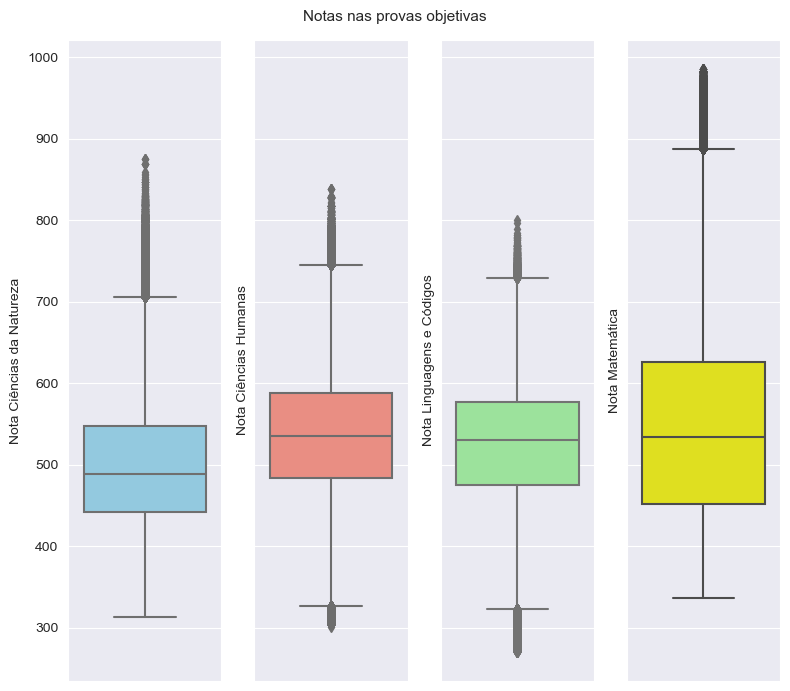

In [10]:
# DEFININDO ESTILIZAÇÃO BOXPLOT
sns.set_style("darkgrid")
figura, axes = plt.subplots(1,4, sharey = True, figsize = (8,7))

# DEFININDO NOMES DAS ÁREAS DE CONHECIMENTO
nomes = {0:"Nota Ciências da Natureza",1:"Nota Ciências Humanas",2:"Nota Linguagens e Códigos",3:"Nota Matemática"}

# DEFININDO CORES
cores = ["skyblue", "salmon", "lightgreen", "yellow"]

# BOXPLOT
for i in range(len(colunas_notas)):
    sns.boxplot(data=enem22, y = colunas_notas[i], ax = axes[i], color=cores[i])

# DEFININDO RÓTULOS DO EIXO Y
for i in range(len(nomes)):
    axes[i].set_ylabel(f"{(nomes[i])}")

plt.suptitle("Notas nas provas objetivas", fontsize=11)
plt.tight_layout()
plt.show()

Os gráficos acima permitem algumas observações:
- Ciências da Natureza possui a menor mediana das 4 provas.
- Ciências da Natureza possui a maior quantidade de outliers de notas altas entre as 4 provas e não possui outliers de notas baixas, o que sugere uma concentração maior de notas menores.
- Ciencias da Natureza, Ciências Humanas e Linguagens e Códigos, visualmente parecem possuir disperções parecidas, enquanto a disperção da nota de matemática é claramente maior.
- As maiores notas estão na prova de Matemática.
- As menores notas estão na prova de Linguagens e Códigos.

Os histogramas darão mais informações e confirmarão algumas dessas hipóteses.

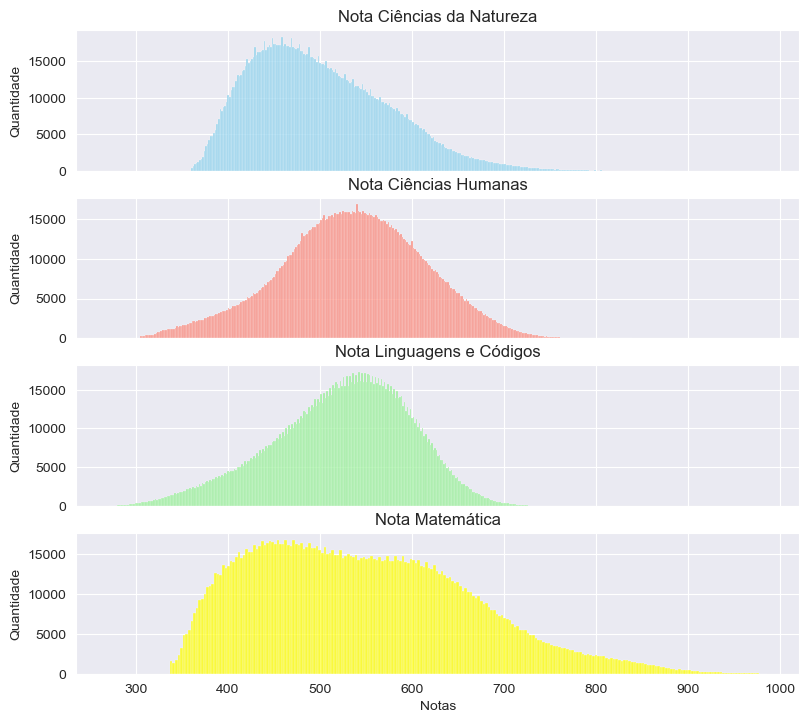

In [11]:
# DEFININDO ESTILIZAÇÃO DOS HISTOGRAMAS.
sns.set_style("darkgrid")
figura, axes = plt.subplots(4,1, sharex= True, figsize=(8,7))
plt.tight_layout()

# HISTOGRAMAS
for i in range(len(colunas_notas)):
    sns.histplot(data=enem22, x=colunas_notas[i], ax = axes[i], color = cores[i]).set_title(f"{nomes[i]}")

# CORREÇÃO LEGENDA DO GRÁFICO 
axes[3].set_xlabel("Notas", fontsize = 10)

# DEFININDO NOME DO EIXO Y
for i in range(4):
    axes[i].set_ylabel("Quantidade", fontsize = 10)

plt.show()

In [12]:
estat = enem22[colunas_notas].describe()
estat

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
count,1.841583e+06,1.841583e+06,1.841583e+06,1.841583e+06
mean,4.996195e+02,5.342551e+02,5.235401e+02,5.460053e+02
std,7.320226e+01,7.825953e+01,7.478863e+01,1.172135e+02
min,3.136000e+02,3.011000e+02,2.706000e+02,3.368000e+02
25%,4.428000e+02,4.835000e+02,4.759000e+02,4.515000e+02
50%,4.892000e+02,5.357000e+02,5.305000e+02,5.342000e+02
75%,5.482000e+02,5.881000e+02,5.773000e+02,6.258000e+02
max,8.753000e+02,8.392000e+02,8.010000e+02,9.857000e+02


Os histogramas confirmaram algumas informações que os boxplots já sugeriam. Há mesmo uma disperção maior nas notas de matemática. Com concentração maior entre as notas 400 e 500.

### Distribuição das Notas da Prova de Redação

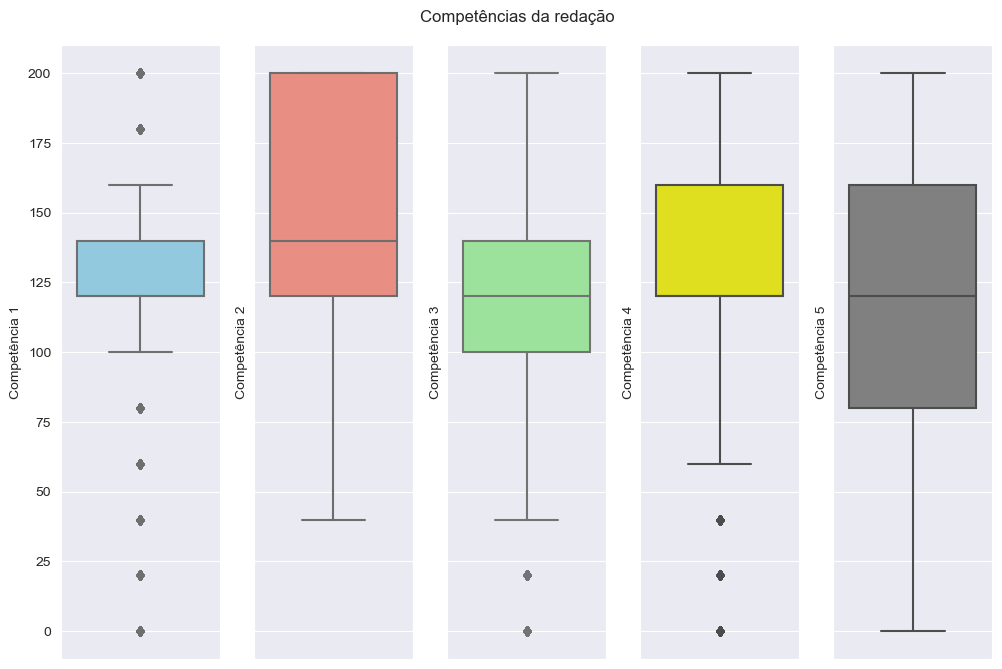

In [13]:
# DEFININDO ESTILIZAÇÃO DO BOXPLOT
sns.set_style("darkgrid")
figura, axes = plt.subplots(1,5, figsize=(10,7), sharey = True)
plt.suptitle("Competências da redação")
plt.tight_layout()

# DEFININDO CORES
cores = ["skyblue", "salmon", "lightgreen", "yellow", "gray"]

# BOXPLOTS
for i in range(len(colunas_notas_redacao)-1):
    sns.boxplot(data=enem22, y=colunas_notas_redacao[i], ax = axes[i], color = cores[i])

# LEGENDA
names = {0:"Competência 1", 1:"Competência 2", 2:"Competência 3", 3:"Competência 4", 4:"Competência 5"}
for i in range(len(names)):
    axes[i].set_ylabel(f"{(names[i])}")


plt.show()

#### Dicionário das competências:

1) Demonstrar domínio da modalidade escrita formal da Língua Portuguesa
2) Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa
3) Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista
4) Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação
5) Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos

#### Os gráficos acima permitem algumas observações:
- As medianas das competências 3 e 5 são muito próximas. E mais baixas do que as outras. 
- Os candidatos possuem maior facilidade com a competência 2, dada a concentração de notas altas.
- A competência 5 provavelmente é a que trás maior dificuldade aos candidatos, dada a maior distribuição de notas, além da menor média.

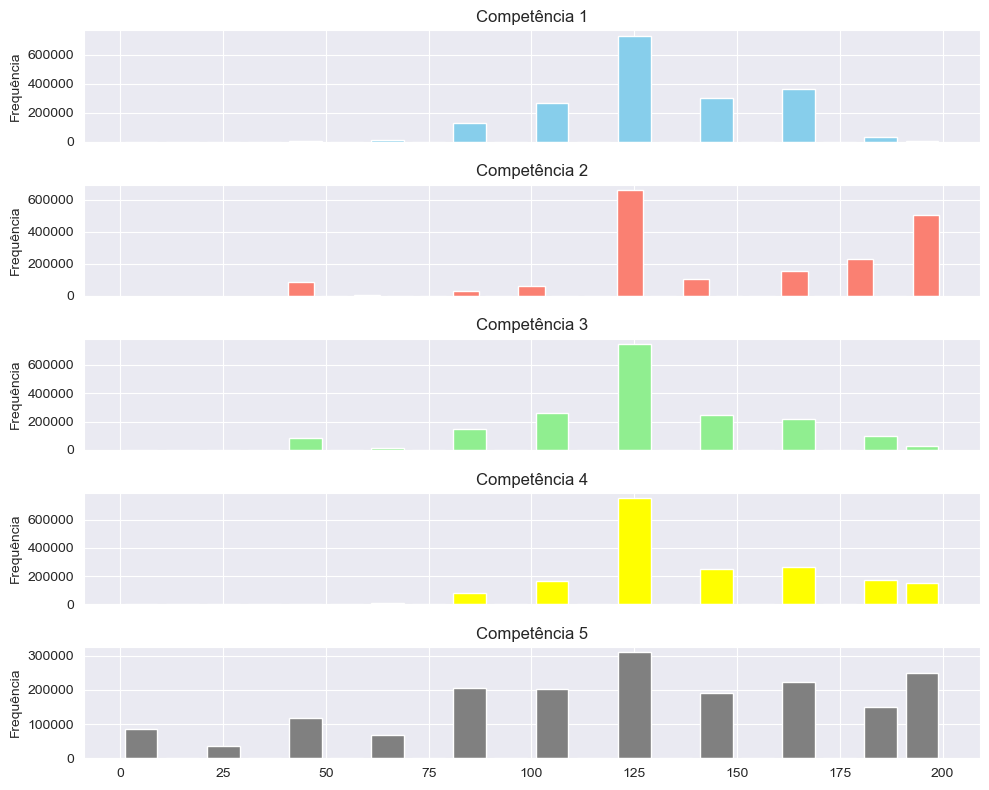

In [14]:
# DEFININDO ESTILIZAÇÃO DO HISTOGRAMA
sns.set_style("darkgrid")
figura, axes = plt.subplots(5,1, figsize=(10,8), sharex= True)

# HISTOGRAMAS
# for i in range(len(colunas_notas_redacao)-1):
#     sns.histplot(data=enem22[f'NU_NOTA_COMP{i+1}'], ax = axes[i], color = cores[i]).set_title(f"{names[i]}")

for i in range(len(colunas_notas_redacao)-1):
    axes[i].hist(enem22[f'NU_NOTA_COMP{i+1}'], bins=20, color=cores[i], alpha=1, rwidth=0.8)
    axes[i].set_title(f"{names[i]}")
    
# CORREÇÃO LEGENDA DO GRÁFICO 
axes[4].set_xlabel("")

# DEFININDO NOME DO EIXO Y
for i in range(5):
    axes[i].set_ylabel("Frequência")

plt.tight_layout()
plt.show()

In [15]:
estat = enem22[colunas_notas_redacao].describe()
estat

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,1.841583e+06,1.841583e+06,1.841583e+06,1.841583e+06,1.841583e+06,1.841583e+06
mean,1.259122e+02,1.487485e+02,1.214844e+02,1.369395e+02,1.210508e+02,6.541355e+02
std,2.515406e+01,4.351241e+01,3.231434e+01,3.130057e+01,5.507772e+01,1.612875e+02
min,0.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01
25%,1.200000e+02,1.200000e+02,1.000000e+02,1.200000e+02,8.000000e+01,5.400000e+02
50%,1.200000e+02,1.400000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.400000e+02
75%,1.400000e+02,2.000000e+02,1.400000e+02,1.600000e+02,1.600000e+02,7.800000e+02
max,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03


Os histogramas mostram uma disperção maior na competência 5, além da menor média entre as diferentes competências.

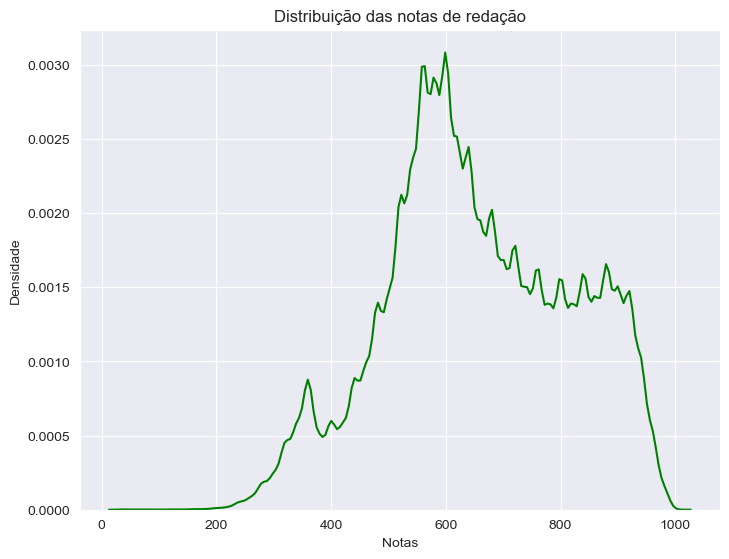

In [16]:
# DEFININDO A FIGURA
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])

# DENSIDADE
sns.kdeplot(data=enem22['NU_NOTA_REDACAO'], color = "green", ax = axes).set_title("Distribuição das notas de redação")

# LEGENDAS
axes.set_xlabel("Notas", fontsize = 10)
axes.set_ylabel("Densidade", fontsize = 10)
plt.show()

### Distribuição das Notas Gerais

**A média aritimética das notas das provas para atribuição da nota final no ENEM é uma simplificação. É sabido que o Sistema de Seleção Unificada (Sisu) pode atribuir pesos diferentes para as provas dependendo do curso pleiteado, o que impacta a pontuação final do candidato.**


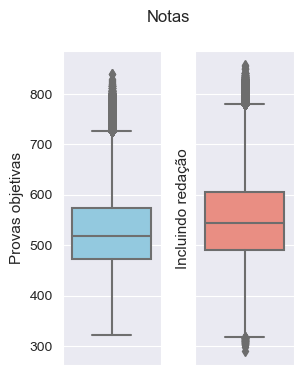

In [17]:
notas = ['NOTA_OBJ', 'NOTA']

# DEFININDO ESTILIZAÇÃO DO BOXPLOT
sns.set_style("darkgrid")
figura, axes = plt.subplots(1,2, figsize=(3,4), sharey = True)
plt.suptitle("Notas")
plt.tight_layout()

# DEFININDO CORES
cores = ["skyblue", "salmon"]

# BOXPLOTS
for i in range(len(notas)):
    sns.boxplot(data=enem22, y=notas[i], ax = axes[i], color = cores[i])

# LEGENDA
names = {0:"Provas objetivas", 1:"Incluindo redação"}
for i in range(len(names)):
    axes[i].set_ylabel(f"{(names[i])}", fontsize = 11)


plt.show()

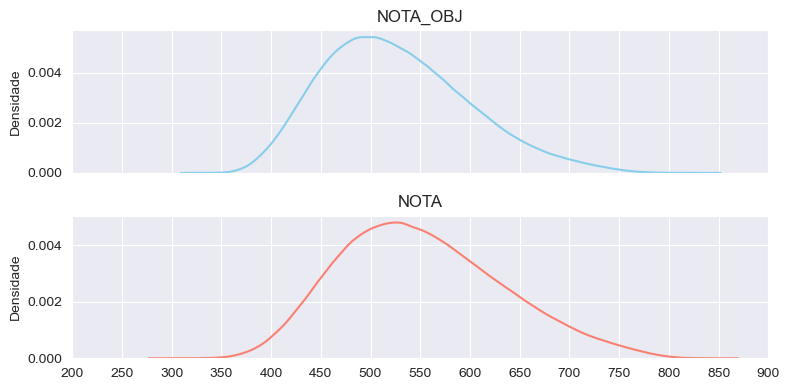

In [18]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set_style("darkgrid")
figura, axes = plt.subplots(2,1, figsize=(8,4), sharex= True)

# DENSIDADE
for i in range(len(notas)):
    sns.kdeplot(data=enem22[notas[i]], color=cores[i], ax=axes[i])
    axes[i].set_title(f"{notas[i]}")
    
    # EIXO X EM INTERVALOR DE 50 PONTOS
    axes[i].set_xticks(range(200, int(enem22[notas[i]].max()) + 50, 50))
    
# CORREÇÃO LEGENDA DO GRÁFICO 
axes[1].set_xlabel("")

# DEFININDO NOME DO EIXO Y
for i in range(2):
    axes[i].set_ylabel("Densidade")

plt.tight_layout()
plt.show()

In [19]:
estat = enem22[notas].describe()
estat

,NOTA_OBJ,NOTA
count,1.841583e+06,1.841583e+06
mean,5.258550e+02,5.515111e+02
std,7.324241e+01,8.217042e+01
min,3.217000e+02,2.905600e+02
25%,4.714250e+02,4.906800e+02
50%,5.181750e+02,5.439800e+02
75%,5.729500e+02,6.059600e+02
max,8.398000e+02,8.559800e+02


In [20]:
# MODA DA NOTA DO ENEM
enem22['NOTA'].mode()

0    530.6
Name: NOTA, dtype: float64

### 5% melhores

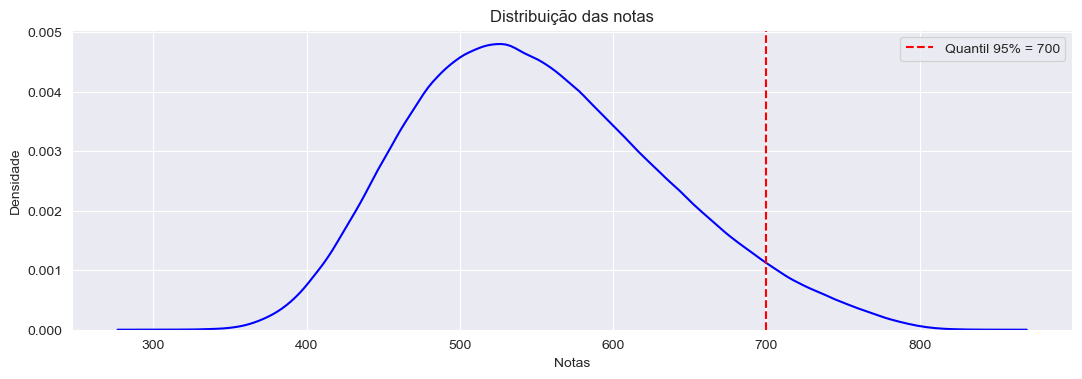

In [21]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set_style("darkgrid")

# DEFININDO A FIGURA
figura = plt.figure(figsize=(10, 3))
axes = figura.add_axes([0, 0, 1, 1])

# DENSIDADE
sns.kdeplot(data=enem22['NOTA'], color="blue", ax=axes).set_title("Distribuição das notas")

# QUANTIL 95%
quantil_95 = enem22['NOTA'].quantile(0.95)

# ADICIONA LINHA VERTICAL NO QUANTIL 95%
axes.axvline(x=quantil_95, color='red', linestyle='--', label=f'Quantil 95% = {round(quantil_95)}')

# LEGENDAS
axes.set_xlabel("Notas", fontsize=10)
axes.set_ylabel("Densidade", fontsize=10)
axes.legend()

plt.show()

In [22]:
print(f'Quem obteve notas acima de {round(quantil_95)} pontos, está à frente de pelo menos 95% das notas do ENEM.')

Quem obteve notas acima de 700 pontos, está à frente de pelo menos 95% das notas do ENEM.


In [23]:
# SELEÇÃO SOMENTE DAS NOTAS QUE ESTÃO ACIMA DO 5% MELHOR
top5 = enem22[enem22['NOTA'] >= 700]

# NÚMERO DE NOTAS NO TOP 5%
top5.shape[0]

91954

## Estudos sobre dados do participante

### Idade dos candidatos

In [24]:
# TRANSFORMANDO CATEGORIAS EM DESCRIÇÃO
dic_faixa_etaria = {1: 'Menor de 17 anos', 2: '17 anos', 3: '18 anos', 4: '19 anos', 5: '20 anos', 6: '21 anos', 7: '22 anos', 8: '23 anos', 9: '24 anos', 10: '25 anos', 11: 'Entre 26 e 30 anos', 12: 'Entre 31 e 35 anos', 13: 'Entre 36 e 40 anos', 14: 'Entre 41 e 45 anos', 15: 'Entre 46 e 50 anos', 16: 'Entre 51 e 55 anos', 17: 'Entre 56 e 60 anos', 18: 'Entre 61 e 65 anos', 19: 'Entre 66 e 70 anos', 20: 'Maior de 70 anos'}
idades_desc = enem22[['TP_FAIXA_ETARIA']].copy()
idades_desc['TP_FAIXA_ETARIA'] = idades_desc['TP_FAIXA_ETARIA'].map(dic_faixa_etaria)
#dades_desc['TP_FAIXA_ETARIA'] = pd.Categorical(idades_desc['TP_FAIXA_ETARIA'], categories=dic_faixa_etaria)

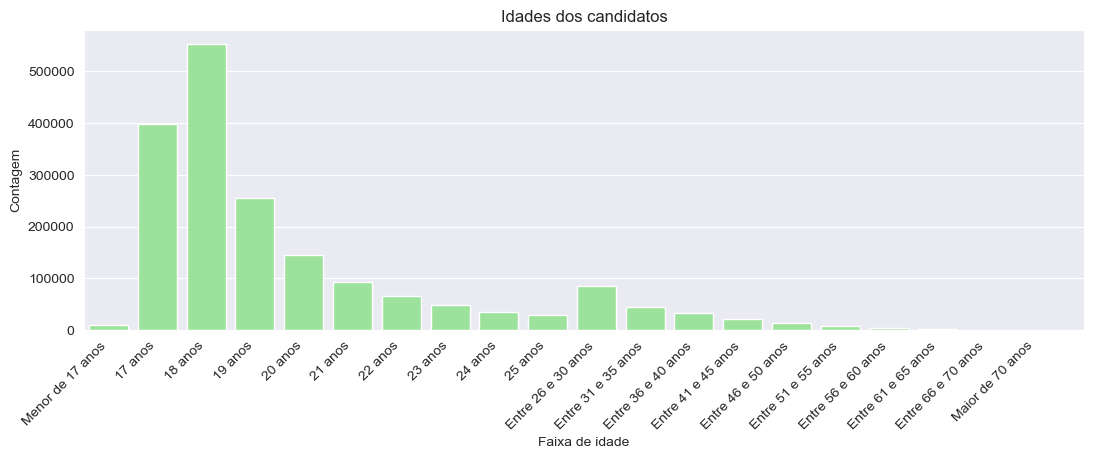

In [25]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set_style("darkgrid")

# DEFININDO A FIGURA
figura = plt.figure(figsize=(10, 3))
axes = figura.add_axes([0, 0, 1, 1])

# CORRIGINDO ORDEM DAS CATEGORIAS
categorias_ordenadas = list(dic_faixa_etaria.values())
idades_desc['TP_FAIXA_ETARIA'] = pd.Categorical(idades_desc['TP_FAIXA_ETARIA'], categories=categorias_ordenadas, ordered=True)

# CONTAGEM
sns.countplot(data=enem22, x=idades_desc['TP_FAIXA_ETARIA'], color="lightgreen", ax=axes).set_title("Idades dos candidatos")

# LEGENDAS
axes.set_xlabel("Faixa de idade", fontsize=10)
axes.set_ylabel("Contagem", fontsize=10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha="right")


# CORRIGINDO ESCALA DO EIXO X
eixo_x_ticks = np.arange(0, 21, 1)
axes.set_xticks(eixo_x_ticks)

plt.show()

Contagem do valores de cada categoria.

In [26]:
idades_desc['TP_FAIXA_ETARIA'].value_counts(normalize = True)* 100

18 anos               29.968565
17 anos               21.574645
19 anos               13.824519
20 anos                7.857642
21 anos                4.993313
Entre 26 e 30 anos     4.600444
22 anos                3.537772
23 anos                2.613404
Entre 31 e 35 anos     2.436274
24 anos                1.931328
Entre 36 e 40 anos     1.753546
25 anos                1.582497
Entre 41 e 45 anos     1.204996
Entre 46 e 50 anos     0.763962
Menor de 17 anos       0.486049
Entre 51 e 55 anos     0.464057
Entre 56 e 60 anos     0.252120
Entre 61 e 65 anos     0.100620
Entre 66 e 70 anos     0.039694
Maior de 70 anos       0.014553
Name: TP_FAIXA_ETARIA, dtype: float64

### Sexo dos candidatos

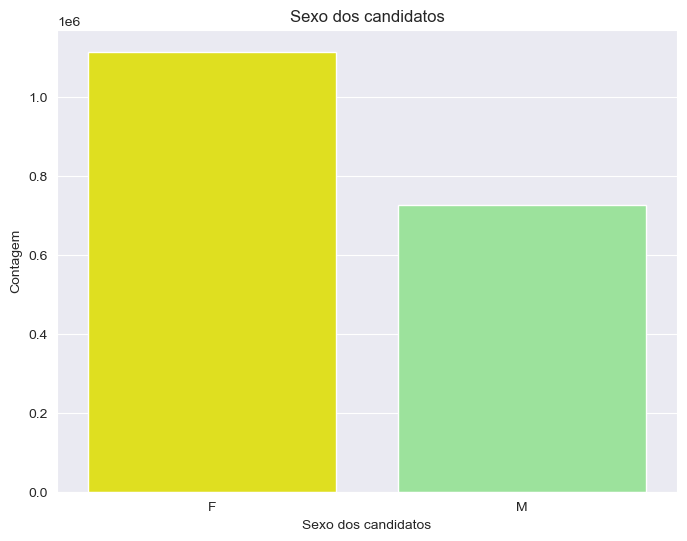

In [27]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set_style("darkgrid")

# DEFININDO A FIGURA
figura, axes = plt.subplots(figsize=(8, 6))

# CORES
cores = ["yellow", "lightgreen"]

# CONTAGEM
sns.countplot(data=enem22, x='TP_SEXO', palette=cores, ax=axes).set_title("Sexo dos candidatos")

# LEGENDAS
axes.set_xlabel("Sexo dos candidatos", fontsize=10)
axes.set_ylabel("Contagem", fontsize=10)

plt.show()

Participação feminina e masculina em porcentagens.

In [28]:
enem22['TP_SEXO'].value_counts(normalize = True)* 100

F    60.565231
M    39.434769
Name: TP_SEXO, dtype: float64

### Estado Civil

In [29]:
# TRANSFORMANDO CATEGORIAS EM DESCRIÇÃO
dic_estado_civil = {0: 'Não informado', 1: 'Solteiro', 2: 'Casado(a)/Mora com companheiro(a)', 3: 'Divorciado(a)/Desquitado(a)/Separado(a)', 4: 'Viúvo(a)'}
estado_civil = enem22[['TP_ESTADO_CIVIL']].copy()
estado_civil['TP_ESTADO_CIVIL'] = estado_civil['TP_ESTADO_CIVIL'].map(dic_estado_civil)

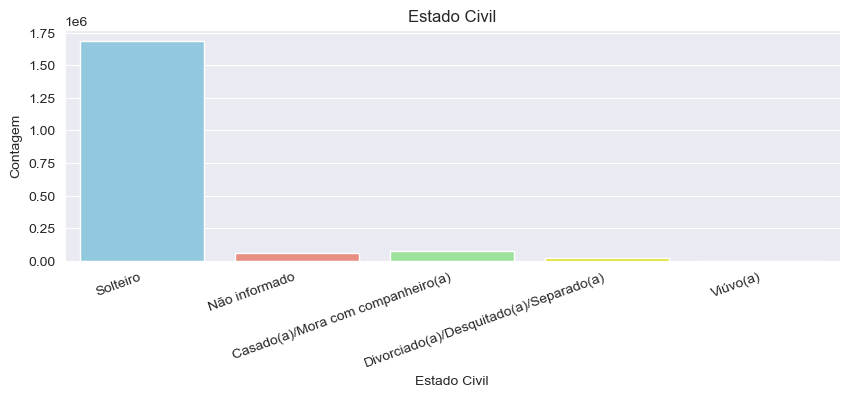

In [30]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set_style("darkgrid")

# DEFININDO A FIGURA
figura, axes = plt.subplots(figsize=(10, 3))

# DEFININDO CORES
cores = ["skyblue", "salmon", "lightgreen", "yellow", "gray"]

# CONTAGEM
sns.countplot(data=enem22, x=estado_civil['TP_ESTADO_CIVIL'], palette=cores, ax=axes).set_title("Estado Civil")

# LEGENDAS
axes.set_xlabel("Estado Civil", fontsize=10)
axes.set_ylabel("Contagem", fontsize=10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=20, ha="right")

plt.show()

Proporção de candidatos por Estado Civil.

In [31]:
enem22['TP_ESTADO_CIVIL'].value_counts(normalize = True)* 100

1    91.641159
2     3.962026
0     3.066709
3     1.244527
4     0.085579
Name: TP_ESTADO_CIVIL, dtype: float64

### Cor/raça

In [32]:
# TRANSFORMANDO CATEGORIAS EM DESCRIÇÃO
dic_cor_raca = {0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena ', 6: 'Não dispõe da informação'}
cor_raca = enem22[['TP_COR_RACA']].copy()
cor_raca['TP_COR_RACA'] = cor_raca['TP_COR_RACA'].map(dic_cor_raca)

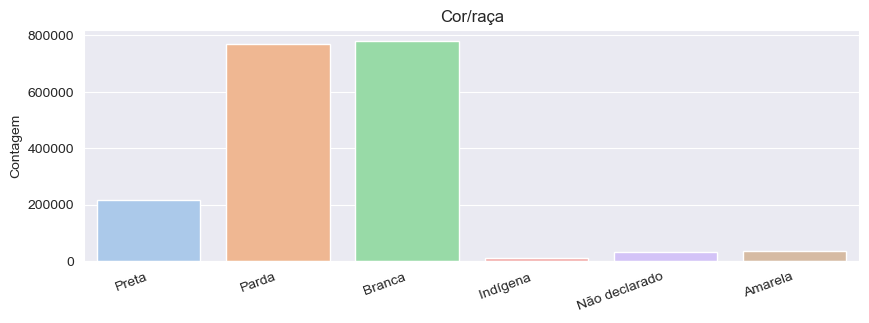

In [33]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set_style("darkgrid")

# DEFININDO A FIGURA
figura, axes = plt.subplots(figsize=(10, 3))

# CONTAGEM
sns.countplot(data=enem22, x=cor_raca['TP_COR_RACA'], palette="pastel", ax=axes).set_title("Cor/raça")

# LEGENDAS
axes.set_xlabel("")
axes.set_ylabel("Contagem", fontsize=10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=20, ha="right")

plt.show()

In [34]:
cor_raca['TP_COR_RACA'].value_counts(normalize = True)* 100

Branca           42.351933
Parda            41.829937
Preta            11.718885
Amarela           1.875778
Não declarado     1.725689
Indígena          0.497778
Name: TP_COR_RACA, dtype: float64

### Tipo de escola: Pública ou Privada

In [35]:
dic_tipo_escola = {1:'Não Respondeu', 2:'Pública', 3:'Privada'}
tipo_escola = enem22[['TP_ESCOLA']].copy()
tipo_escola['TP_ESCOLA'] = tipo_escola['TP_ESCOLA'].map(dic_tipo_escola)

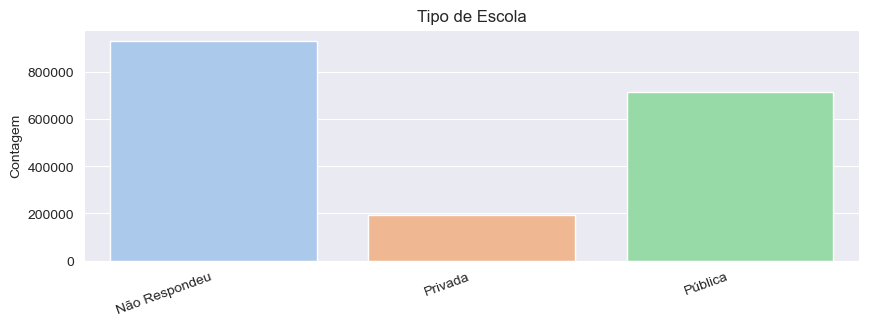

In [36]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set_style("darkgrid")

# DEFININDO A FIGURA
figura, axes = plt.subplots(figsize=(10, 3))

# CONTAGEM
sns.countplot(data=enem22, x=tipo_escola['TP_ESCOLA'], palette="pastel", ax=axes).set_title("Tipo de Escola")

# LEGENDAS
axes.set_xlabel("")
axes.set_ylabel("Contagem", fontsize=10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=20, ha="right")

plt.show()

In [37]:
tipo_escola['TP_ESCOLA'].value_counts(normalize = True)* 100

Não Respondeu    50.658265
Pública          38.755245
Privada          10.586490
Name: TP_ESCOLA, dtype: float64

### Localidade dos candidatos

Examinaremos em qual unidade federativa se localiza a escola onde os candidatos concluíram o seu Ensino Médio.

In [38]:
enem22['SG_UF_ESC'].value_counts(dropna = False, normalize= True)* 100

NaN    64.238755
SP      7.257995
CE      3.407775
MG      2.826101
RJ      2.720974
PR      1.923997
BA      1.727753
RS      1.670899
PE      1.624146
GO      1.436427
PA      1.332712
SC      1.219169
MA      1.036988
DF      0.829830
PB      0.815440
ES      0.802353
RN      0.714005
AM      0.694294
PI      0.670564
MT      0.617512
AL      0.569727
MS      0.487515
SE      0.428273
RO      0.312829
TO      0.262274
AC      0.155247
AP      0.146287
RR      0.070157
Name: SG_UF_ESC, dtype: float64

Acima obtivemos a informação de que aproximadamente 64% das observações não constam na base de dados. Sendo assim, como proxy, usaremos a informação da localidade onde o candidato realizou a prova. Observe que o parâmetro 'dropna' garante que valores inválidos sejam incluídos à saída.

In [39]:
enem22['SG_UF_PROVA'].value_counts(dropna = False, normalize=True) * 100

SP    16.064657
MG     9.096522
BA     7.844230
RJ     7.501970
CE     6.439080
PA     5.739356
PE     5.432935
RS     4.470719
PR     4.343763
MA     3.793910
GO     3.553030
PB     3.081642
RN     2.765012
PI     2.468583
SC     2.303562
DF     2.035694
AL     1.882837
AM     1.871705
ES     1.821422
SE     1.725418
MT     1.500503
MS     1.194190
RO     0.807892
TO     0.768252
AC     0.661822
AP     0.626635
RR     0.204661
Name: SG_UF_PROVA, dtype: float64

## Questionário Socioeconômico

Adiante, examinaremos as respostas ao questionário socioeconômico. Em posse das informações sobre dados pessoais e sobre o questionário socioeconômico, será possível traçar o perfil do candidato típico que está apto a ingressar na universidade. Bem como o perfil dos 5% melhores.

In [40]:
# MAPEAR AS RESPOSTAS DO QUESTIONÁRIO SOCIOECONOMICO

# LEITURA DO ARQUIVO E CRIAÇÃO DO DICIONÁRIO DE DICIONÁRIOS
mapeamento = {}
with open('dic_resp_questionario.txt', 'r') as f:
    for line in f:
        # REMOVE O NOME DA COLUNA E O SINAL DE IGUAL
        nome_coluna, values_str = map(str.strip, line.split('='))
        
        # ast.literal_eval É BOA PRÁTICA NO LUGAR DE eval
        mapeamento[nome_coluna] = ast.literal_eval(values_str)

# APLICA O MAPEAMENTO EM CADA COLUNA
for nome_coluna in mapeamento.keys():
    if nome_coluna in enem22.columns:
        enem22[nome_coluna] = enem22[nome_coluna].map(mapeamento[nome_coluna])

Questão 001 - Até que série seu pai, ou o homem responsável por você, estudou?

In [41]:
contagem_normalizada = enem22['Q001'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Completou o Ensino Médio, mas não completou a Faculdade.                                   30.516137
Não completou a 4ª série/5º ano do Ensino Fundamental.                                     16.184500
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.    12.865670
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.       11.222139
Completou a Faculdade, mas não completou a Pós-graduação.                                   9.870801
Não sei.                                                                                    8.950506
Completou a Pós-graduação.                                                                  6.919319
Nunca estudou.                                                                              3.470927
Name: Q001, dtype: float64


Questão 002 - Até que série sua mãe, ou a mulher responsável por você, estudou?

In [42]:
contagem_normalizada = enem22['Q002'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Completou o Ensino Médio, mas não completou a Faculdade.                                   36.539434
Completou a Faculdade, mas não completou a Pós-graduação.                                  13.185938
Completou a Pós-graduação.                                                                 12.020039
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.       11.634284
Não completou a 4ª série/5º ano do Ensino Fundamental.                                     11.243751
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.    10.529637
Não sei.                                                                                    2.706584
Nunca estudou.                                                                              2.140333
Name: Q002, dtype: float64


Questão 003 - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).

In [43]:
contagem_normalizada = enem22['Q003'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.                                                                                                                                                                         23.576021
Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.    21.312208
Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motori

Questão 004 - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).

In [44]:
contagem_normalizada = enem22['Q004'].value_counts(normalize=True) * 100
tabulate(print(contagem_normalizada))

Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.                                                                                                        40.421692
Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.    26.100534
Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, gali

''

Questão 005 - Incluindo você, quantas pessoas moram atualmente em sua residência?

In [45]:
contagem_normalizada = enem22['Q005'].value_counts(normalize=True) * 100
print(contagem_normalizada)

4                           33.839963
3                           27.957904
5                           14.971196
2                           12.923555
6                            4.890738
1, pois moro sozinho(a).     2.433559
7                            1.738124
8                            0.702819
9                            0.265098
10                           0.146939
11                           0.051152
12                           0.034970
13                           0.014607
14                           0.008525
20                           0.007548
15                           0.007113
16                           0.002009
17                           0.002009
19                           0.001249
18                           0.000923
Name: Q005, dtype: float64


Questão 006 - Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

In [46]:
contagem_normalizada = enem22['Q006'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Até R$ 1.212,00                      28.017418
De R$ 1.212,01 até R$ 1.818,00.      16.759386
De R$ 1.818,01 até R$ 2.424,00.      12.289807
De R$ 2.424,01 até R$ 3.030,00.       8.357321
De R$ 3.636,01 até R$ 4.848,00.       6.028998
De R$ 4.848,01 até R$ 6.060,00.       5.778615
Nenhuma Renda                         5.123744
De R$ 3.030,01 até R$ 3.636,00.       4.841704
De R$ 6.060,01 até R$ 7.272,00.       2.446862
De R$ 7.272,01 até R$ 8.484,00.       1.716838
De R$ 9.696,01 até R$ 10.908,00.      1.529988
De R$ 10.908,01 até R$ 12.120,00.     1.440554
Acima de R$ 24.240,00.                1.295081
De R$ 8.484,01 até R$ 9.696,00.       1.207602
De R$ 14.544,01 até R$ 18.180,00.     1.120178
De R$ 12.120,01 até R$ 14.544,00.     1.036825
De R$ 18.180,01 até R$ 24.240,00.     1.009078
Name: Q006, dtype: float64


Questão 007 - Em sua residência trabalha empregado(a) doméstico(a)?

In [47]:
contagem_normalizada = enem22['Q007'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Não.                                      91.800913
Sim, um ou dois dias por semana.           4.615051
Sim, pelo menos cinco dias por semana.     2.573927
Sim, três ou quatro dias por semana.       1.010109
Name: Q007, dtype: float64


Questão 008 - Na sua residência tem banheiro?

In [48]:
contagem_normalizada = enem22['Q008'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Sim, um.                63.165548
Sim, dois.              25.006095
Sim, três.               7.435940
Sim, quatro ou mais.     3.801729
Não.                     0.590687
Name: Q008, dtype: float64


Questão 009 - Na sua residência tem quartos para dormir?

In [49]:
contagem_normalizada = enem22['Q009'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Sim, dois.              49.560948
Sim, três.              33.563679
Sim, um.                10.563629
Sim, quatro ou mais.     5.703843
Não.                     0.607901
Name: Q009, dtype: float64


Questão 010 - Na sua residência tem carro?

In [50]:
contagem_normalizada = enem22['Q010'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Não.                    49.493724
Sim, um.                39.861413
Sim, dois.               9.299282
Sim, três.               1.109046
Sim, quatro ou mais.     0.236536
Name: Q010, dtype: float64


Questão 011 - Na sua residência tem motocicleta?

In [51]:
contagem_normalizada = enem22['Q011'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Não.                    75.412186
Sim, uma.               21.833227
Sim, duas.               2.480475
Sim, três.               0.232300
Sim, quatro ou mais.     0.041812
Name: Q011, dtype: float64


Questão 012 - Na sua residência tem geladeira?

In [52]:
contagem_normalizada = enem22['Q012'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Sim, uma.               93.212959
Sim, duas.               5.131183
Não.                     1.223893
Sim, três.               0.363003
Sim, quatro ou mais.     0.068962
Name: Q012, dtype: float64


Questão 013 - Na sua residência tem freezer (independente ou segunda porta da geladeira)?

In [53]:
contagem_normalizada = enem22['Q013'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Não.                    50.989665
Sim, uma.               45.180641
Sim, duas.               3.359935
Sim, três.               0.384126
Sim, quatro ou mais.     0.085633
Name: Q013, dtype: float64


Questão 014 - Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)

In [54]:
contagem_normalizada = enem22['Q014'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Sim, uma.               64.227950
Não.                    34.579870
Sim, duas.               1.144070
Sim, três.               0.039640
Sim, quatro ou mais.     0.008471
Name: Q014, dtype: float64


Questão 015 - Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?

In [55]:
contagem_normalizada = enem22['Q015'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Não.                    86.314166
Sim, uma.               13.518370
Sim, duas.               0.153401
Sim, três.               0.009394
Sim, quatro ou mais.     0.004670
Name: Q015, dtype: float64


Questão 016 - Na sua residência tem forno micro-ondas?

In [56]:
contagem_normalizada = enem22['Q016'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Sim, uma.               51.478049
Não.                    47.800778
Sim, duas.               0.683868
Sim, três.               0.028345
Sim, quatro ou mais.     0.008960
Name: Q016, dtype: float64


Questão 017 - Na sua residência tem máquina de lavar louça?

In [57]:
contagem_normalizada = enem22['Q017'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Não.                    96.660590
Sim, uma.                3.279353
Sim, duas.               0.049794
Sim, três.               0.005973
Sim, quatro ou mais.     0.004290
Name: Q017, dtype: float64


Questão 018 - Na sua residência tem aspirador de pó?

In [58]:
contagem_normalizada = enem22['Q018'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Não.    74.001118
Sim.    25.998882
Name: Q018, dtype: float64


Questão 019 - Na sua residência tem televisão em cores?

In [59]:
contagem_normalizada = enem22['Q019'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Sim, uma.               63.920985
Sim, duas.              19.924597
Sim, três.               7.277869
Não.                     5.536650
Sim, quatro ou mais.     3.339898
Name: Q019, dtype: float64


Questão 020 - Na sua residência tem aparelho de DVD?

In [60]:
contagem_normalizada = enem22['Q020'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Não.    82.691739
Sim.    17.308261
Name: Q020, dtype: float64


Questão 021 - Na sua residência tem TV por assinatura?

In [61]:
contagem_normalizada = enem22['Q021'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Não.    77.034758
Sim.    22.965242
Name: Q021, dtype: float64


Questão 022 - Na sua residência tem telefone celular?

In [62]:
contagem_normalizada = enem22['Q022'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Sim, três.              31.771959
Sim, duas.              26.581588
Sim, quatro ou mais.    24.483990
Sim, uma.               15.103311
Não.                     2.059152
Name: Q022, dtype: float64


Questão 023 - Na sua residência tem telefone fixo?

In [63]:
contagem_normalizada = enem22['Q023'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Não.    86.795545
Sim.    13.204455
Name: Q023, dtype: float64


Questão 024 - Na sua residência tem computador?

In [64]:
contagem_normalizada = enem22['Q024'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Não.                    43.329299
Sim, uma.               40.224524
Sim, duas.              10.685970
Sim, três.               3.903544
Sim, quatro ou mais.     1.856664
Name: Q024, dtype: float64


Questão 025 - Na sua residência tem acesso à Internet?

In [65]:
contagem_normalizada = enem22['Q025'].value_counts(normalize=True) * 100
print(contagem_normalizada)

Sim.    91.608578
Não.     8.391422
Name: Q025, dtype: float64


### Respostas mais comuns no questionário socioeconômico:
    
- Pai completou o Ensino Médio, mas não completou a Faculdade. - 30,5%
- Mãe completou o Ensino Médio, mas não completou a Faculdade. - 36,5%
- Grupo que mais apareceu como profissão do pai: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista. - 23%
- Grupo que mais apareceu como profissão da mãe: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria. - 40%
-  33% moram em residência com 4 pessoas no total.
- 28% possuíam renda familiar de até R$ 1.212,00
- 91% não possuem empregado doméstico na residência.
- 63% possuem somente um banheiro na residência.
- 49,5% das residências possuem dois quartos para dormir.
- 49% das residências não há carro.
- 75% das residências não há motocicleta.
- 93% das residências possuem uma geladeira.
- 51% das residências não possui freezer (independente ou segunda porta da geladeira).
- 64% das residências possuem uma máquina de lavar roupa.
- 51% das residências possuem um forno micro-ondas.
- 96% das residências não possuem máquina de lavar louça.
- 74% das residências não possuem aspirador de pó.
- Em somente 5% das residências não há televisão.
- 82% das residências não possuem aparelho de DVD.
- 77% das residências não há TV por assinatura.
- Somente em 2% das residências não há pelo menos um aparelho de telefone celular.
- 86% das residências não há telefone fixo.
- 43% das residências não há computador.
- 95% das residências possui acesso à Internet.

## Perfil típico Vs Perfil no top 5%

### Perfil do chamado candidato típico:

- Sexo Feminino
- 18 anos de idade
- Solteira
- Cor/raça autoidentificado como: Preta ou Parda
- Brasileira
- Concluiu o Ensino Médio na escola Pública.
- Fez a prova no Estado de São Paulo
- Renda mensal da família: Até R$ 1.212,00

Selecionarei na base principal os candidatos que se encaixam no perfil típico e examinaremos as notas usando boxplot e histograma.

In [66]:
# SELEÇÃO NA BASE DE DADOS PRINCIPAL SOMENTE QUEM SE ENCAIXA NO PERFIL TÍPICO

# CARREGA O ARQUIVO SEM MAPEAMENTO
#enem22 = pd.read_csv('enem_filtrado.csv')

# SELEÇÃO USANDO OS CRITÉRIO DO PERFIL TÍPICO
perfil_tipico = enem22.query('(TP_FAIXA_ETARIA == 3) & \
                            (TP_SEXO == "F") & \
                            (TP_ESTADO_CIVIL == 1) & \
                            ((TP_COR_RACA == 2) | (TP_COR_RACA == 3)) & \
                            (TP_NACIONALIDADE == 1) & \
                            (SG_UF_PROVA == "SP")')

In [67]:
perfil_tipico['NOTA'].describe()

count    21226.000000
mean       538.807582
std         65.923875
min        336.600000
25%        491.980000
50%        533.940000
75%        581.555000
max        813.320000
Name: NOTA, dtype: float64

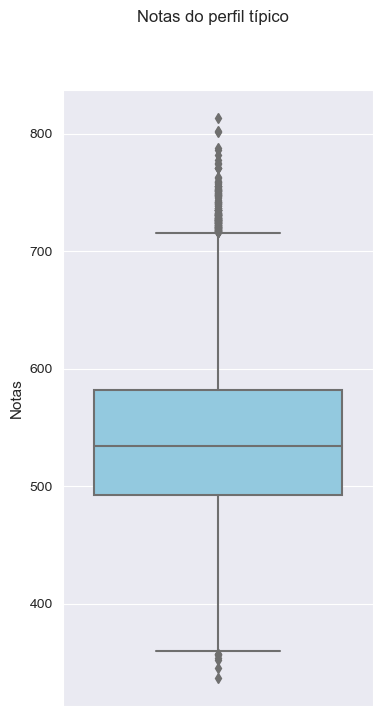

In [68]:
# DEFININDO ESTILIZAÇÃO DO BOXPLOT
sns.set_style("darkgrid")
figura = plt.figure(figsize=(4,8))
plt.suptitle("Notas do perfil típico")
plt.tight_layout()

# BOXPLOTS
sns.boxplot(data=perfil_tipico, y=perfil_tipico['NOTA'], color="skyblue")

# LEGENDA
plt.ylabel("Notas", fontsize=11)

plt.show()

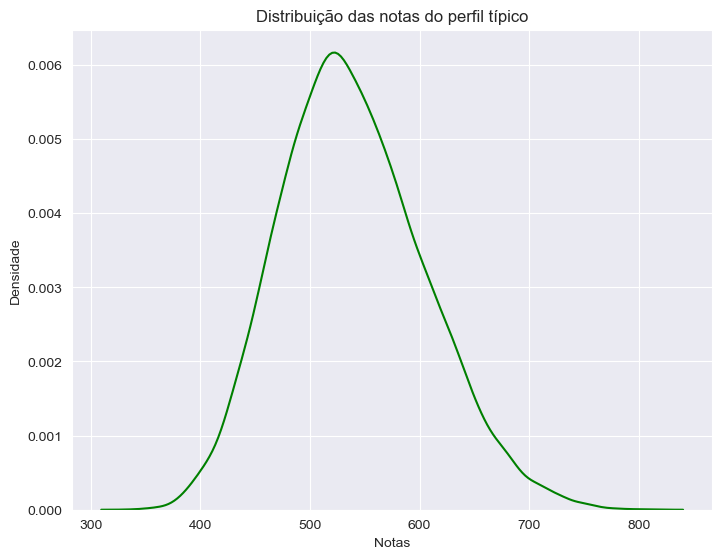

In [69]:
# DEFININDO A FIGURA
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])

# DENSIDADE
sns.kdeplot(data=perfil_tipico['NOTA'], color = "green", ax = axes).set_title("Distribuição das notas do perfil típico")

# LEGENDAS
axes.set_xlabel("Notas", fontsize = 10)
axes.set_ylabel("Densidade", fontsize = 10)
plt.show()

A nota média para o perfil típico ficou em 438.

Muito próximo da moda das notas, que ficou em 430.

Mas abaixo da média geral que ficou em 550.

### Para examinar o perfil no top 5%, utilizarei a seleção chamada top5.

In [70]:
# SELEÇÃO SOMENTE DAS NOTAS QUE ESTÃO ACIMA DO 5% MELHOR
top5 = enem22[enem22['NOTA'] >= 700]

# NÚMERO DE NOTAS NO TOP 5%
top5.shape[0]

91954

In [71]:
top5['NOTA'].describe()

count    91954.000000
mean       733.371573
std         25.507654
min        700.000000
25%        712.280000
50%        727.980000
75%        749.580000
max        855.980000
Name: NOTA, dtype: float64

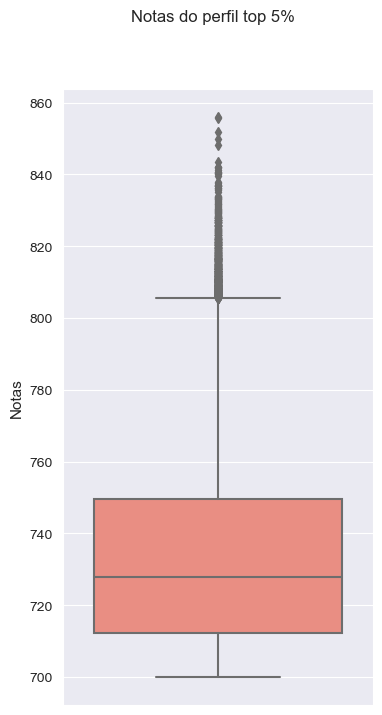

In [72]:
# DEFININDO ESTILIZAÇÃO DO BOXPLOT
sns.set_style("darkgrid")
figura = plt.figure(figsize=(4,8))
plt.suptitle("Notas do perfil top 5%")
plt.tight_layout()

# BOXPLOTS
sns.boxplot(data=top5, y='NOTA', color="salmon")

# LEGENDA
plt.ylabel("Notas", fontsize=11)

plt.show()

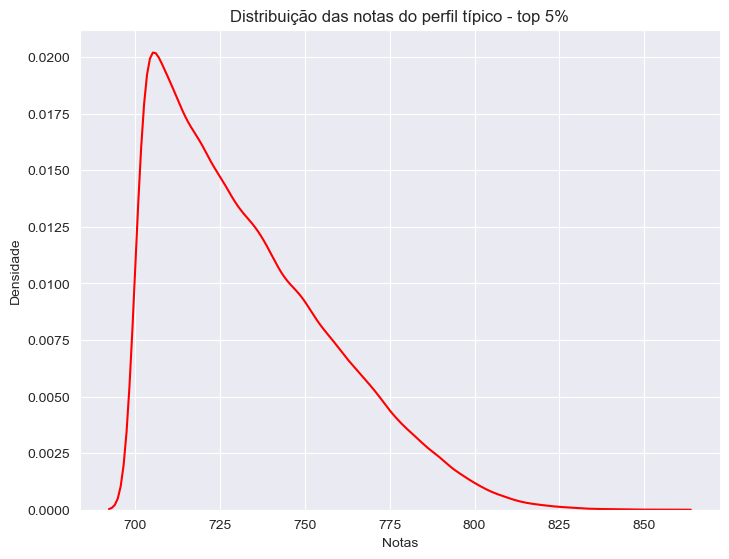

In [73]:
# DEFININDO A FIGURA
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])

# DENSIDADE
sns.kdeplot(data=top5['NOTA'], color = "red", ax = axes).set_title("Distribuição das notas do perfil típico - top 5%")

# LEGENDAS
axes.set_xlabel("Notas", fontsize = 10)
axes.set_ylabel("Densidade", fontsize = 10)
plt.show()

#### Idade

In [74]:
# TRANSFORMANDO CATEGORIAS EM DESCRIÇÃO
dic_faixa_etaria = {1: 'Menor de 17 anos', 2: '17 anos', 3: '18 anos', 4: '19 anos', 5: '20 anos', 6: '21 anos', 7: '22 anos', 8: '23 anos', 9: '24 anos', 10: '25 anos', 11: 'Entre 26 e 30 anos', 12: 'Entre 31 e 35 anos', 13: 'Entre 36 e 40 anos', 14: 'Entre 41 e 45 anos', 15: 'Entre 46 e 50 anos', 16: 'Entre 51 e 55 anos', 17: 'Entre 56 e 60 anos', 18: 'Entre 61 e 65 anos', 19: 'Entre 66 e 70 anos', 20: 'Maior de 70 anos'}
idades_desc = top5[['TP_FAIXA_ETARIA']].copy()
idades_desc['TP_FAIXA_ETARIA'] = idades_desc['TP_FAIXA_ETARIA'].map(dic_faixa_etaria)

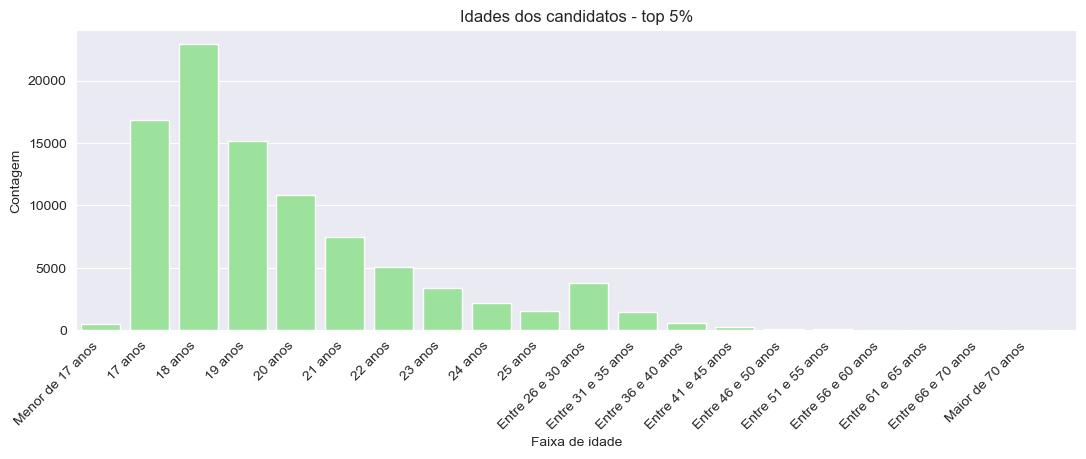

In [75]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set_style("darkgrid")

# DEFININDO A FIGURA
figura = plt.figure(figsize=(10, 3))
axes = figura.add_axes([0, 0, 1, 1])

# CORRIGINDO ORDEM DAS CATEGORIAS
categorias_ordenadas = list(dic_faixa_etaria.values())
idades_desc['TP_FAIXA_ETARIA'] = pd.Categorical(idades_desc['TP_FAIXA_ETARIA'], categories=categorias_ordenadas, ordered=True)

# CONTAGEM
sns.countplot(data=top5, x=idades_desc['TP_FAIXA_ETARIA'], color="lightgreen", ax=axes).set_title("Idades dos candidatos - top 5%")

# LEGENDAS
axes.set_xlabel("Faixa de idade", fontsize=10)
axes.set_ylabel("Contagem", fontsize=10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha="right")


# CORRIGINDO ESCALA DO EIXO X
eixo_x_ticks = np.arange(0, 21, 1)
axes.set_xticks(eixo_x_ticks)

plt.show()

In [76]:
idades_desc['TP_FAIXA_ETARIA'].value_counts(normalize = True)* 100

18 anos               24.904844
17 anos               18.320030
19 anos               16.460404
20 anos               11.741740
21 anos                8.092090
22 anos                5.504926
Entre 26 e 30 anos     4.125976
23 anos                3.642038
24 anos                2.394676
25 anos                1.653000
Entre 31 e 35 anos     1.568175
Entre 36 e 40 anos     0.641625
Menor de 17 anos       0.498075
Entre 41 e 45 anos     0.261000
Entre 46 e 50 anos     0.102225
Entre 51 e 55 anos     0.056550
Entre 56 e 60 anos     0.020663
Entre 61 e 65 anos     0.008700
Entre 66 e 70 anos     0.003263
Maior de 70 anos       0.000000
Name: TP_FAIXA_ETARIA, dtype: float64

#### Sexo dos candidatos

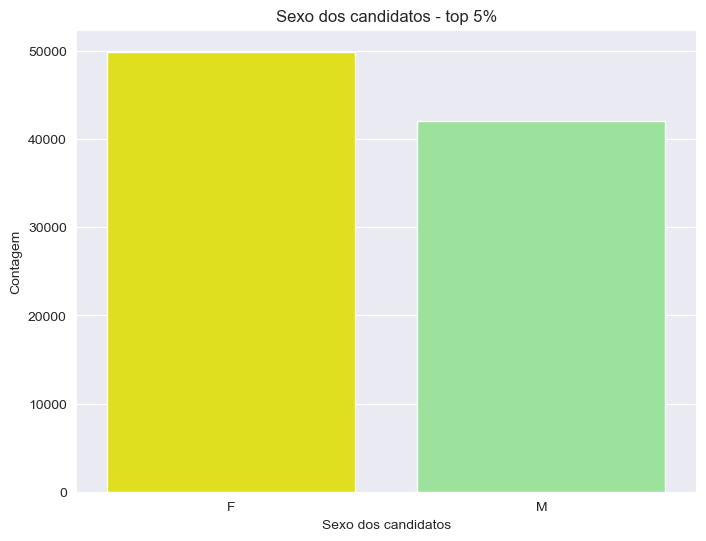

In [77]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set_style("darkgrid")

# DEFININDO A FIGURA
figura, axes = plt.subplots(figsize=(8, 6))

# CORES
cores = ["yellow", "lightgreen"]

# CONTAGEM
sns.countplot(data=top5, x='TP_SEXO', palette=cores, ax=axes).set_title("Sexo dos candidatos - top 5%")

# LEGENDAS
axes.set_xlabel("Sexo dos candidatos", fontsize=10)
axes.set_ylabel("Contagem", fontsize=10)

plt.show()

In [78]:
top5['TP_SEXO'].value_counts(normalize = True)* 100

F    54.256476
M    45.743524
Name: TP_SEXO, dtype: float64

#### Estado Civil

In [79]:
# TRANSFORMANDO CATEGORIAS EM DESCRIÇÃO
dic_estado_civil = {0: 'Não informado', 1: 'Solteiro', 2: 'Casado(a)/Mora com companheiro(a)', 3: 'Divorciado(a)/Desquitado(a)/Separado(a)', 4: 'Viúvo(a)'}
estado_civil = top5[['TP_ESTADO_CIVIL']].copy()
estado_civil['TP_ESTADO_CIVIL'] = estado_civil['TP_ESTADO_CIVIL'].map(dic_estado_civil)

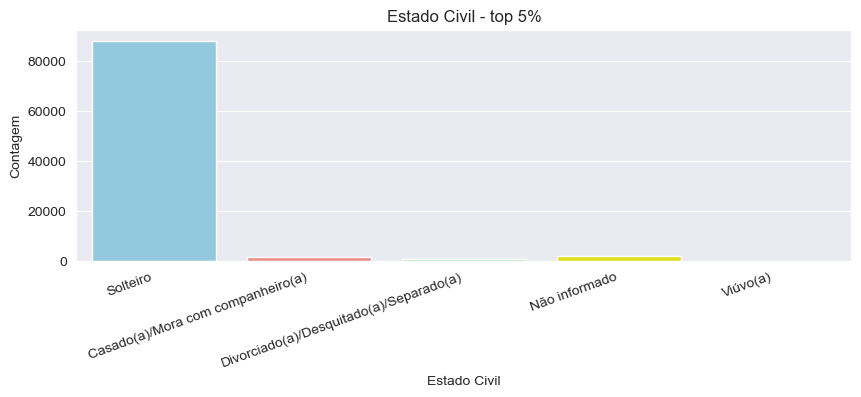

In [80]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set_style("darkgrid")

# DEFININDO A FIGURA
figura, axes = plt.subplots(figsize=(10, 3))

# DEFININDO CORES
cores = ["skyblue", "salmon", "lightgreen", "yellow", "gray"]

# CONTAGEM
sns.countplot(data=top5, x=estado_civil['TP_ESTADO_CIVIL'], palette=cores, ax=axes).set_title("Estado Civil - top 5%")

# LEGENDAS
axes.set_xlabel("Estado Civil", fontsize=10)
axes.set_ylabel("Contagem", fontsize=10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=20, ha="right")

plt.show()

In [81]:
estado_civil['TP_ESTADO_CIVIL'].value_counts(normalize=True) * 100

Solteiro                                   95.941449
Não informado                               1.895513
Casado(a)/Mora com companheiro(a)           1.595363
Divorciado(a)/Desquitado(a)/Separado(a)     0.555713
Viúvo(a)                                    0.011963
Name: TP_ESTADO_CIVIL, dtype: float64

#### Cor/raça

In [82]:
# TRANSFORMANDO CATEGORIAS EM DESCRIÇÃO
dic_cor_raca = {0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena ', 6: 'Não dispõe da informação'}
cor_raca = top5[['TP_COR_RACA']].copy()
cor_raca['TP_COR_RACA'] = cor_raca['TP_COR_RACA'].map(dic_cor_raca)

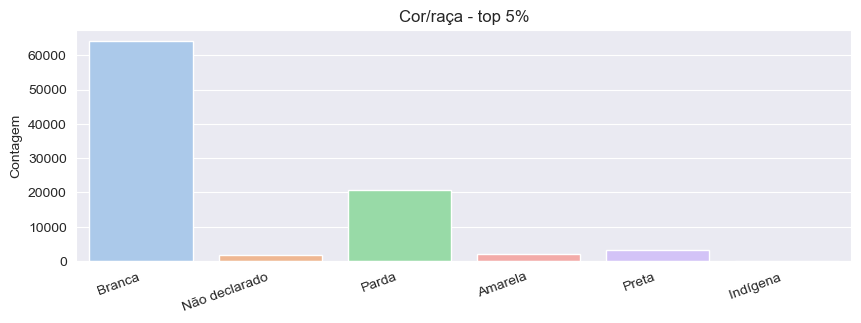

In [83]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set_style("darkgrid")

# DEFININDO A FIGURA
figura, axes = plt.subplots(figsize=(10, 3))

# CONTAGEM
sns.countplot(data=top5, x=cor_raca['TP_COR_RACA'], palette="pastel", ax=axes).set_title("Cor/raça - top 5%")

# LEGENDAS
axes.set_xlabel("")
axes.set_ylabel("Contagem", fontsize=10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=20, ha="right")

plt.show()

In [84]:
cor_raca['TP_COR_RACA'].value_counts(normalize = True)* 100

Branca           69.764230
Parda            22.375318
Preta             3.640951
Amarela           2.356613
Não declarado     1.807425
Indígena          0.055463
Name: TP_COR_RACA, dtype: float64

#### Tipo de escola: Pública ou Privada

In [85]:
dic_tipo_escola = {1:'Não Respondeu', 2:'Pública', 3:'Privada'}
tipo_escola = top5[['TP_ESCOLA']].copy()
tipo_escola['TP_ESCOLA'] = tipo_escola['TP_ESCOLA'].map(dic_tipo_escola)

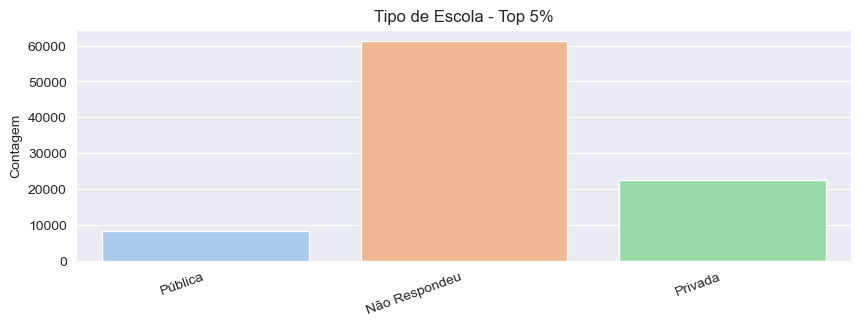

In [86]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set_style("darkgrid")

# DEFININDO A FIGURA
figura, axes = plt.subplots(figsize=(10, 3))

# CONTAGEM
sns.countplot(data=top5, x=tipo_escola['TP_ESCOLA'], palette="pastel", ax=axes).set_title("Tipo de Escola - Top 5%")

# LEGENDAS
axes.set_xlabel("")
axes.set_ylabel("Contagem", fontsize=10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=20, ha="right")

plt.show()

In [87]:
tipo_escola['TP_ESCOLA'].value_counts(normalize = True)* 100

Não Respondeu    66.747504
Privada          24.320856
Pública           8.931640
Name: TP_ESCOLA, dtype: float64

#### Localidade dos candidatos

Novamente usarei a coluna com a observação sobre a unidade federativa da realização da prova.

In [88]:
enem22['SG_UF_PROVA'].value_counts(dropna = False, normalize=True) * 100

SP    16.064657
MG     9.096522
BA     7.844230
RJ     7.501970
CE     6.439080
PA     5.739356
PE     5.432935
RS     4.470719
PR     4.343763
MA     3.793910
GO     3.553030
PB     3.081642
RN     2.765012
PI     2.468583
SC     2.303562
DF     2.035694
AL     1.882837
AM     1.871705
ES     1.821422
SE     1.725418
MT     1.500503
MS     1.194190
RO     0.807892
TO     0.768252
AC     0.661822
AP     0.626635
RR     0.204661
Name: SG_UF_PROVA, dtype: float64

#### Questão 006 - Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

In [56]:
contagem_normalizada = top5['Q006'].value_counts(normalize=True) * 100
print(contagem_normalizada)

De R$ 4.848,01 até R$ 6.060,00.      11.238228
De R$ 3.636,01 até R$ 4.848,00.       8.573852
Acima de R$ 24.240,00.                8.139940
De R$ 2.424,01 até R$ 3.030,00.       6.710964
De R$ 1.818,01 até R$ 2.424,00.       6.561977
De R$ 6.060,01 até R$ 7.272,00.       6.309677
De R$ 1.212,01 até R$ 1.818,00.       5.755051
De R$ 18.180,01 até R$ 24.240,00.     5.603889
De R$ 14.544,01 até R$ 18.180,00.     5.587576
De R$ 10.908,01 até R$ 12.120,00.     5.552776
De R$ 9.696,01 até R$ 10.908,00.      5.504926
De R$ 3.030,01 até R$ 3.636,00.       5.394001
De R$ 7.272,01 até R$ 8.484,00.       5.010114
Até R$ 1.212,00                       4.868739
De R$ 12.120,01 até R$ 14.544,00.     4.581639
De R$ 8.484,01 até R$ 9.696,00.       4.046589
Nenhuma Renda                         0.560063
Name: Q006, dtype: float64


### Perfil top 5%:

- Sexo Feminino
- 18 anos de idade
- Solteira
- Cor/raça autoidentificado como: Branca
- Brasileira
- Concluiu o Ensino Médio na escola Privada.
- Fez a prova no Estado de São Paulo
- Renda mensal da família: De R\$$4.848,01 a R$6.060,00.

In [58]:
# RESPOSTAS AO QUESTIONÁRIO SOCIOECONÔMICO
# COLUNAS DAS RESPOSTAS DOS QUESTIONÁRIOS
colunas_q = top5.loc[:, 'Q001':'Q025']

# MOSTRA TODAS AS RESPOSTAS DOS QUESTIONÁRIOS
for coluna in colunas_q:
    contagem_normalizada = top5[coluna].value_counts(normalize=True) * 100
    print(f"Frequência normalizada em porcentagem(%) para a coluna {coluna}:\n{contagem_normalizada}\n")

Frequência normalizada em porcentagem(%) para a coluna Q001:
Completou o Ensino Médio, mas não completou a Faculdade.                                   28.675207
Completou a Faculdade, mas não completou a Pós-graduação.                                  26.717707
Completou a Pós-graduação.                                                                 25.816169
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.        6.269439
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.     5.526676
Não completou a 4ª série/5º ano do Ensino Fundamental.                                      3.767101
Não sei.                                                                                    2.836201
Nunca estudou.                                                                              0.391500
Name: Q001, dtype: float64

Frequência normalizada em porcentagem(%) para a coluna Q002:
Completou a Pós-graduação.                

#### Respostas mais comuns no questionário socioeconômico - top 5%:

- Pai completou o Ensino Médio, mas não completou a Faculdade. - 28,5%
- Mãe completou a Pós-graduação. - 34%
- Grupo que mais apareceu como profissão do pai, 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria. - 42%
- Grupo que mais apareceu como profissão da mãe: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria. - 49%
-  39% moram em residência com 4 pessoas no total.
- somente 4,9% possuíam renda familiar de até R$ 1.212,00.
- O Grupo mais frequente é: ‘De R\$\$ 4.848,01 até R\$ 6.060,00’ – 11,2%
- 71% não possuem empregado doméstico na residência.
- 25% possuem somente um banheiro na residência.
	-Resposta mais frequente: ‘Sim, dois.’ – 35,9%
- 30,8% das residências possuem dois quartos para dormir.
	- Mais frequente: ‘Sim, três.’ - 50,7%
- somente 18% das residências não há carro.
	- Mais frequente: ‘Sim, um.’ - 50,4%
- 82% das residências não há motocicleta, ante 79% no perfil típico.
- somente 0,26% das residências não possui geladeira.
- somente 25% das residências não possui freezer (independente ou segunda porta da geladeira).
- 86,6% das residências possuem uma máquina de lavar roupa.
- 74,6% das residências possuem um forno micro-ondas.
- 87% das residências não possuem máquina de lavar louça.
- 57% das residências possuem aspirador de pó.
- Em somente 2,5% das residências não há televisão.
- 68% das residências não possuem aparelho de DVD.
- 55% das residências não há TV por assinatura.
- Somente em menos de 1% das residências não há pelo menos um aparelho de telefone celular.
- 72% das residências não há telefone fixo.
- em somente 7% das residências não há computador.
- 99% das residências possui acesso à Internet.

## Comparando as diferenças

Nesta seção, produzirei gráficos simples utilizando os diferentes recortes socioculturais produzidos pelos dois padrões observados.

### Raça/cor

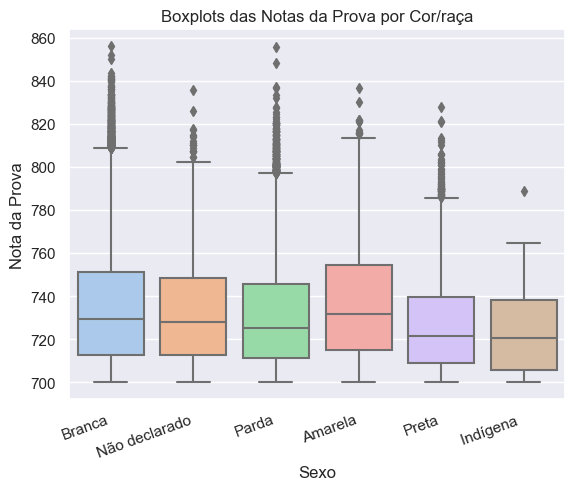

In [89]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set(style="darkgrid", palette='pastel')

# DEFININDO A FIGURA
fig, ax = plt.subplots()

# BOXPLOTS
sns.boxplot(x='TP_COR_RACA', y=enem22['NOTA'], data=cor_raca, ax=ax)

# RÓTULOS
ax.set_xlabel('Sexo')
ax.set_ylabel('Nota da Prova')
ax.set_title('Boxplots das Notas da Prova por Cor/raça')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

plt.show()

### Tipo de Escola

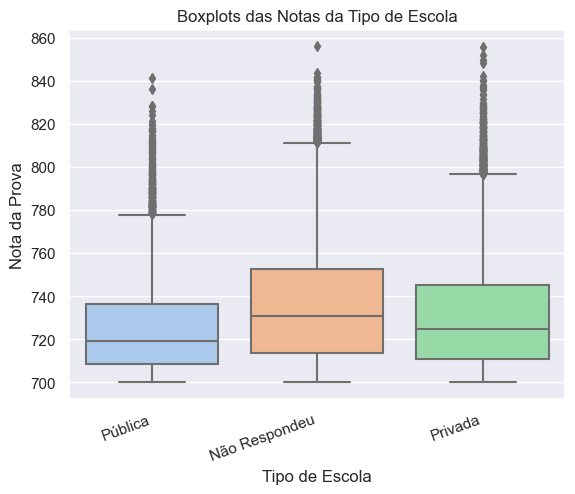

In [90]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set(style="darkgrid", palette='pastel')

# DEFININDO A FIGURA
fig, ax = plt.subplots()

# BOXPLOTS
sns.boxplot(x='TP_ESCOLA', y=enem22['NOTA'], data=tipo_escola, ax=ax)

# RÓTULOS
ax.set_xlabel('Tipo de Escola')
ax.set_ylabel('Nota da Prova')
ax.set_title('Boxplots das Notas da Tipo de Escola')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

plt.show()

### Renda Mensal Familiar

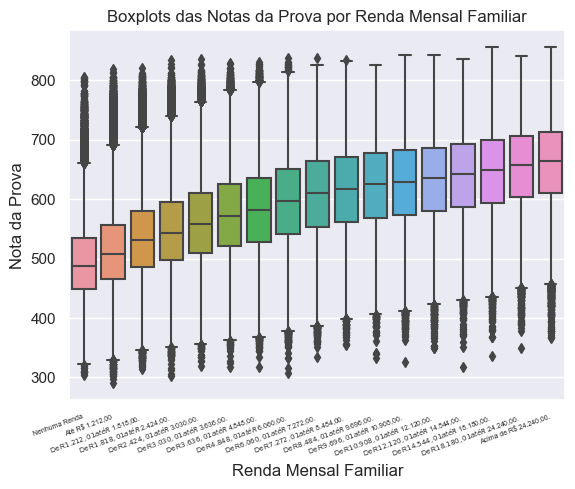

In [91]:
# DEFININDO ESTILIZAÇÃO DA FIGURA
sns.set(style="darkgrid", palette='pastel')

# ORDENAÇÃO DAS CATEGORIAS
ordenacao_renda = ['Nenhuma Renda', 'Até R$ 1.212,00', 'De R$ 1.212,01 até R$ 1.818,00.',
                   'De R$ 1.818,01 até R$ 2.424,00.', 'De R$ 2.424,01 até R$ 3.030,00.',
                   'De R$ 3.030,01 até R$ 3.636,00.', 'De R$ 3.636,01 até R$ 4.848,00.',
                   'De R$ 4.848,01 até R$ 6.060,00.', 'De R$ 6.060,01 até R$ 7.272,00.',
                   'De R$ 7.272,01 até R$ 8.484,00.', 'De R$ 8.484,01 até R$ 9.696,00.',
                   'De R$ 9.696,01 até R$ 10.908,00.', 'De R$ 10.908,01 até R$ 12.120,00.',
                   'De R$ 12.120,01 até R$ 14.544,00.', 'De R$ 14.544,01 até R$ 18.180,00.',
                   'De R$ 18.180,01 até R$ 24.240,00.', 'Acima de R$ 24.240,00.']
# DEFININDO A FIGURA
fig, ax = plt.subplots()

# BOXPLOTS
sns.boxplot(x='Q006', y=enem22['NOTA'], data=enem22, order=ordenacao_renda, ax=ax)

# RÓTULOS
ax.set_xlabel('Renda Mensal Familiar')
ax.set_ylabel('Nota da Prova')
ax.set_title('Boxplots das Notas da Prova por Renda Mensal Familiar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right", fontsize=5)

plt.show()

#### Diferenças

Categoria raça/cor: mostra uma mediana visivelmente maior para quem respondeu "Amarela". Uma mediana mais baixa para "Indígena" e "Preta".
Outros grupos visualmente muito próximos.

Categoria tipo de escola: Visualmente, percebe-se a opção "Não respondeu" como grupo com a maior mediana. Seguida pelo grupo que respondeu "Privada" e a menor mediana de notas com o grupo "Pública".

Categoria renda familiar: A justaposição dos boxplots por faixa de renda mostra um resultado visualmente muito interessante. Sugerindo que maiores rendas mensais familiares estão positivamente correlacionadas com as notas das provas. Também chama a atenção os indicadores de outliers em cada série. Onde as faixas de renda que são mais baixas, mostram mais dados considerados distorcidos (baseado na definição de outlier) nas notas altas, sugerindo concentração de notas mais baixas. E nas faixas de renda mais altas há mais notas consideradas distorcidas para baixo, ou seja, maior concentração de notas altas. E essas oposições vão se anulando nas faixas intermediárias.

## Conclusão

### O perfil do chamado candidato típico é:

- Sexo Feminino
- 18 anos de idade
- Solteira
- Cor/raça autoidentificado como: Preta ou Parda
- Brasileira
- Fez a prova no Estado de São Paulo
- Renda mensal da família: Até R$ 1.212,00
    
A nota média para o perfil típico ficou em 438.<br>
Muito próximo da moda das notas, que ficou em 430.<br>
Mas abaixo da média geral que ficou em 550.<br>

### O perfil do candidato top 5% das notas é:

- Sexo Feminino
- 18 anos de idade
- Solteira
- Cor/raça autoidentificado como: Branca
- Brasileira
- Concluiu o Ensino Médio na escola Privada.
- Fez a prova no Estado de São Paulo
- Renda mensal da família: De R$4.848,01 a R$6.060,00.

### Estratégia para melhorar notas - prova objetiva
Pensando do ponto de vista de uma instituição de ensino, é possível chegar a algumas conclusões importantes sobre o desempenho nos diferentes Campos de Conhecimento. As seguintes observações servem tanto para um aluno, quanto para dados agregados da instituição/turma;
- Ciências da Natureza e Matemática são campos de conhecimento onde as médias são maiores do que as medianas, isso implica que alunos que desejam obter maiores médias precisam, necessariamente, ir muito bem nessas provas.
- Ciências Humanas e Linguagens e Códigos são campos do conhecimento onde as médias são menores do que as medianas, e se o objetivo é aumentar a nota final, aqui que os esforços devem ser concentrados após garantir que Ciências da Natureza e Matemática estejam em um patamar adequado. Especialmente Linguagens e Códigos.
- Os pontos anteriores são reforçados pelo uso da Teoria de Resposta ao Item (TRI) na elaboração e correção do ENEM, que leva em conta as questões mais ou menos acertadas para compor a nota.

### Estratégia para melhorar notas - prova de redação
A mesma lógica de análise para as provas objetivas cabe para as competências da redação;
- É mais eficiente para aumentar a nota na competência de menor média. O que apontaria para a competência 5.
- Contudo, a média da competência 3 é muito próxima da média da competência 5 mas com desvio-padrão consideravelmente menor. Fato que sugere que um aumento da nota da competência 3, já que o TRI também é utilizado aqui, promove um aumento maior na nota final da redação do que um aumento semelhante na nota da competência 5.